# Fashion Trend Detection via E-commerce Reviews 


This notebook will analyze a dataset containing over 6,000 reviews left my women via an e-commerce clothing website. The aim of the notebook is to see if there are recurring keywords or phrases amongst the items that will allow us to see what the top trends according to this website are. The benefit of this exersice is that it can be built upon using larger datasets from fashion magazines,social media posts, and comments, etc. that cater to a specific target consumer audience. 

I set up this project as a starter for a larger project that I wish to implement which detects fashion trends since my partner and I would like to start up a social enterprise that matches disadvantages artisans to consumers living in developed regions. For such an endeavour, market research is crucial and instead of reading or skimming through thousands of posts and articles, it would be helpful to pick out key, relevant phrases. 

## Exploring the Data 

As with any data project, understanding the way your data is structured a crucial first step. Though this initial analysis I will answer the following:

1. What is the average age of consumers of this site. 
2. What is the average rating?
3. What types of clothing does this dataset feature?
4. Do consumers of different age groups rate products differently?

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


#Of course we need to import our data!
data = pd.read_csv("reviews.csv")

data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6525 entries, 0 to 6524
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               6525 non-null   int64 
 1   Clothing ID              6525 non-null   int64 
 2   Age                      6525 non-null   int64 
 3   Title                    5457 non-null   object
 4   Review Text              6296 non-null   object
 5   Rating                   6525 non-null   int64 
 6   Recommended IND          6525 non-null   int64 
 7   Positive Feedback Count  6525 non-null   int64 
 8   Division Name            6525 non-null   object
 9   Department Name          6525 non-null   object
 10  Class Name               6525 non-null   object
dtypes: int64(6), object(5)
memory usage: 560.9+ KB


Looks like the dataset is quite complete (at least for the most part!). Now, let's take a jab at answering the aforementioned quesitons. 

In [3]:
#Getting the median as well in case of any outliers
mean_a = data["Age"].mean() ; med_a = data["Age"].median()
print(f"The average age is {round(mean_a)} and the median age is {round(med_a)}.")

The average age is 43 and the median age is 41.


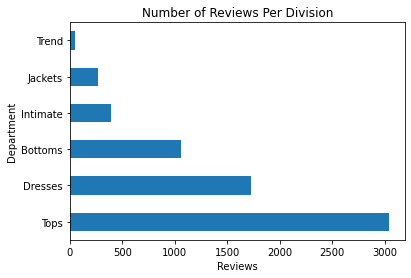

In [4]:
data["Department Name"].value_counts().plot(kind = 'barh')
plt.title('Number of Reviews Per Division')
plt.xlabel('Reviews')
plt.ylabel('Department')
plt.show()

As we can see here, tops and dresses are the most popular types of items. Now, let's see a breakdown of specific clothing items. 

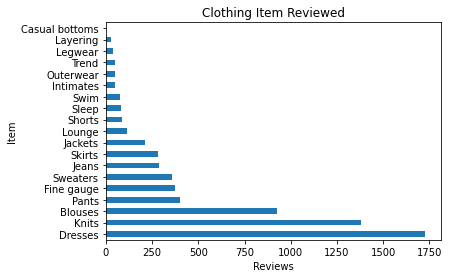

In [5]:
data["Class Name"].value_counts().plot(kind = 'barh')
plt.title('Clothing Item Reviewed')
plt.xlabel('Reviews')
plt.ylabel('Item')
plt.show()

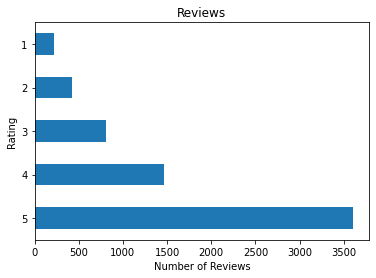

In [6]:
data["Rating"].value_counts().plot(kind = 'barh')
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.title("Reviews")
plt.show()

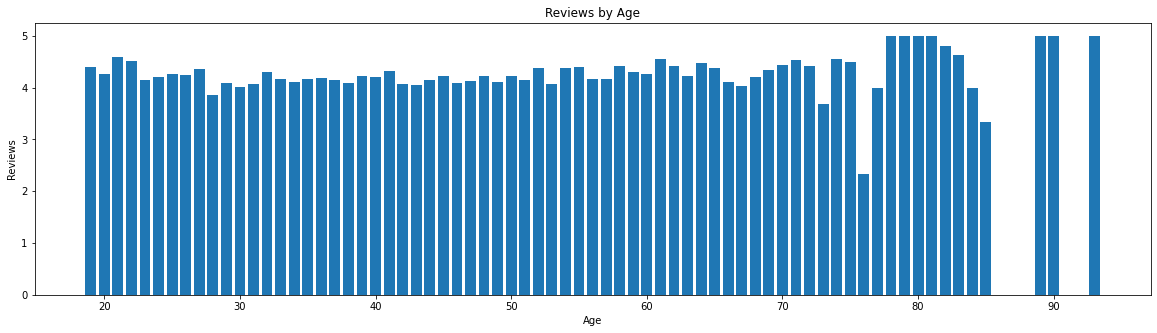

In [7]:
import numpy as np

age_counts = data.groupby('Age').size().reset_index(name='Counts')
ratings = data.groupby('Age').agg({'Rating':np.mean}).reset_index()
age_ratings = pd.merge(age_counts,ratings)

fig = plt.figure(figsize = (20, 5))

plt.bar(age_ratings["Age"], age_ratings["Rating"])
plt.title("Reviews by Age")
plt.xlabel("Age")
plt.ylabel("Reviews")
plt.show()

Looks like consumers aged 76 gave the lowest reviews. Let's see how many there are in this age group and structure the data to see can see the ages more clearly

In [8]:
age_ratings.sort_values("Rating").reset_index(drop=True).head(10)

,Age,Counts,Rating
0,76,3,2.333333
1,85,3,3.333333
2,73,13,3.692308
3,28,114,3.850877
4,84,2,4.000000
5,77,4,4.000000
6,30,100,4.020000
7,67,52,4.038462
8,43,178,4.044944
9,53,136,4.066176


In [9]:
print(f'The mean rating is {round(age_ratings["Rating"].mean(), 2)}.')

The mean rating is 4.29.


We can see here that the lowest ratings were left by consumers aged 57, 66, and 54, and 73 respectively. A relatively large group of 28-year-olds also left ratings that are below the average rating, so it may be worth investigating why this is the case in a later analysis. 

Anyway, from the graphs above we can see that most of the reviews are positive which is great!
Now that there is more of an understanding of how the data is structured, it's time to preprocess it. 

## Preprocessing

I will start by splitting the data set into two. One consisting of good reviews that have a ratin of 4 or 5 and one consisting of 'bad' reviews that are less than 3. This is done in hopes that popular trends can detected from the comments with good ratings. Also, by analyzing phrases and keywords that appear frequently in the bad reviews, a seller can note what to avoid. 

In [10]:
good_reviews = data[data["Rating"] >3]["Review Text"].reset_index(drop = True).dropna()
bad_reviews = data[data["Rating"] < 3]["Review Text"].reset_index(drop = True).dropna()

bad_reviews_string = bad_reviews.to_string()
good_reviews_string = good_reviews.to_string()
good_reviews_string[0:2000]


'0       Absolutely wonderful - silky and sexy and comf...\n1       Love this dress!  it\'s sooo pretty.  i happene...\n2       I love, love, love this jumpsuit. it\'s fun, fl...\n3       This shirt is very flattering to all due to th...\n4       I aded this in my basket at hte last mintue to...\n5       I ordered this in carbon for store pick up, an...\n6       I love this dress. i usually get an xs but it ...\n7       I\'m 5"5\' and 125 lbs. i ordered the s petite t...\n8       This dress is perfection! so pretty and flatte...\n9       More and more i find myself reliant on the rev...\n10      Bought the black xs to go under the larkspur m...\n11      I took these out of the package and wanted the...\n12      Took a chance on this blouse and so glad i did...\n13      A flattering, super cozy coat.  will work well...\n14      I love the look and feel of this tulle dress. ...\n15      If this product was in petite, i would get the...\n16      I\'m upset because for the price of the dre

This text looks like quite a mess. Seems like numbers and punction need to be removed along with capitilzation. 

In [11]:
def clean_text(text):
    import string
    import re
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = ''.join([char.lower() for char in text_nonum if char not in string.punctuation])
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace


text_good = clean_text(good_reviews_string)
text_good[0:2000]

'absolutely wonderful silky and sexy and comf love this dress its sooo pretty i happene i love love love this jumpsuit its fun fl this shirt is very flattering to all due to th i aded this in my basket at hte last mintue to i ordered this in carbon for store pick up an i love this dress i usually get an xs but it im and lbs i ordered the s petite t this dress is perfection so pretty and flatte more and more i find myself reliant on the rev bought the black xs to go under the larkspur m i took these out of the package and wanted the took a chance on this blouse and so glad i did a flattering super cozy coat will work well i love the look and feel of this tulle dress if this product was in petite i would get the im upset because for the price of the dress i love this shirt because when i first saw it the colors werent what i expected either the i have several of goodhyouman shirts and i get this sweater is so comfy and classic it bala beautifully made pants and on trend with the f i neve

## Extracting Key Words and Phrases 

Just for fun, let's try to find the top used words.

In [12]:
from collections import Counter
from gensim.parsing.preprocessing import remove_stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk

#Remove stopwords, tokenize text, and find the most common words. 
filtered_text = remove_stopwords(text_good)
words = nltk.word_tokenize(filtered_text)
Counter = Counter(words)
most_occur = Counter.most_common(25)
  
print(f'The top 10 words are {most_occur}')


The top 10 words are [('love', 1041), ('dress', 882), ('great', 372), ('bought', 314), ('cute', 225), ('beautiful', 222), ('ordered', 218), ('shirt', 217), ('color', 212), ('fit', 196), ('size', 191), ('sweater', 189), ('im', 183), ('soft', 180), ('comfortable', 172), ('perfect', 169), ('like', 165), ('t', 164), ('got', 161), ('wear', 152), ('purchased', 148), ('skirt', 147), ('store', 146), ('pants', 133), ('tried', 133)]


This isn't really interesting because these words along do not tell us anything. Let's see if finding the most popular phrases gives us a little more insight on popular trends. 

In [13]:
from nltk import ngrams
from textblob import TextBlob
from collections import Counter

def most_pop_phrases(text, n=2):
    '''
    Returns the most popular phrases in a string
    with 'n' parameter that dictates how many words 
    each phrase should entail
    '''
    grams = ngrams(text.split(), n)
    c = Counter(grams)
    sorted_c = {k: v for k, v in sorted(c.items(), key=lambda item: item[1], reverse=True)}
    return sorted_c


most_pop_phrases(filtered_text)

{('love', 'dress'): 143,
 ('absolutely', 'love'): 61,
 ('love', 'love'): 57,
 ('love', 'shirt'): 50,
 ('bought', 'dress'): 43,
 ('love', 'sweater'): 38,
 ('love', 'pants'): 34,
 ('true', 'size'): 33,
 ('super', 'cute'): 30,
 ('t', 'love'): 30,
 ('great', 'fit'): 29,
 ('tried', 'store'): 27,
 ('dress', 'beautiful'): 27,
 ('love', 'color'): 23,
 ('soft', 'comfortable'): 22,
 ('saw', 'dress'): 21,
 ('size', 'small'): 21,
 ('fell', 'love'): 21,
 ('super', 'soft'): 21,
 ('usual', 'size'): 19,
 ('love', 'blouse'): 19,
 ('dress', 'perfect'): 19,
 ('saw', 'online'): 18,
 ('ordered', 'dress'): 18,
 ('dress', 'great'): 18,
 ('dress', 'cute'): 18,
 ('beautiful', 'dress'): 18,
 ('dress', 'love'): 17,
 ('local', 'retailer'): 17,
 ('ive', 'looking'): 17,
 ('dress', 'comfortable'): 17,
 ('love', 'skirt'): 17,
 ('fit', 'great'): 17,
 ('dress', 'fits'): 17,
 ('dress', 'gorgeous'): 17,
 ('dress', 'looks'): 17,
 ('love', 'tee'): 17,
 ('fits', 'great'): 17,
 ('great', 'dress'): 17,
 ('im', 'lbs'): 16,
 ('

In [14]:
#Finds phrases of THREE words that are most popular 
most_pop_phrases(filtered_text, 3)

{('love', 'love', 'love'): 19,
 ('absolutely', 'love', 'dress'): 15,
 ('fits', 'true', 'size'): 14,
 ('love', 'love', 'dress'): 9,
 ('ordered', 'usual', 'size'): 7,
 ('love', 'dress', 'bought'): 7,
 ('love', 'dress', 'fits'): 6,
 ('dress', 'super', 'cute'): 6,
 ('tried', 'dress', 'store'): 6,
 ('fell', 'love', 'dress'): 6,
 ('true', 'size', 'love'): 6,
 ('dress', 'fits', 'true'): 5,
 ('usual', 'size', 'small'): 5,
 ('love', 'dress', 'fabric'): 5,
 ('love', 'dress', 'comfortable'): 5,
 ('absolutely', 'love', 'shorts'): 5,
 ('love', 'shirt', 'great'): 5,
 ('love', 'dress', 'super'): 5,
 ('dress', 'caught', 'eye'): 4,
 ('absolutely', 'love', 'sweater'): 4,
 ('saw', 'dress', 'online'): 4,
 ('super', 'soft', 'comfortable'): 4,
 ('usually', 'wear', 'size'): 4,
 ('fit', 'true', 'size'): 4,
 ('super', 'cute', 'flattering'): 4,
 ('dress', 'absolutely', 'love'): 4,
 ('shirt', 'fits', 'great'): 4,
 ('great', 'fit', 'love'): 4,
 ('dress', 'absolutely', 'beautiful'): 4,
 ('im', 'tall', 'lbs'): 4,
 

Let's try another method to see if we can extract the top 15 collocations or sequences of words that occur together at an unusually often rate.

In [15]:
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures

def topn_collocations(text, num = 10):
    '''This function returns top n collocations from input text.'''
    trigram_collocation = TrigramCollocationFinder.from_words(text.split())
    trigram_collocation.apply_freq_filter(4)
    return trigram_collocation.nbest(TrigramAssocMeasures.likelihood_ratio, num)

topn_collocations(filtered_text, num = 15)

[('absolutely', 'love', 'dress'),
 ('fits', 'true', 'size'),
 ('absolutely', 'love', 'sweater'),
 ('fit', 'true', 'size'),
 ('fell', 'love', 'dress'),
 ('true', 'size', 'love'),
 ('absolutely', 'love', 'shorts'),
 ('usual', 'size', 'small'),
 ('ordered', 'usual', 'size'),
 ('dress', 'absolutely', 'love'),
 ('dress', 'caught', 'eye'),
 ('love', 'dress', 'fits'),
 ('super', 'cute', 'flattering'),
 ('super', 'soft', 'comfortable'),
 ('love', 'dress', 'love')]

Looks like many words like 'absolutely' and 'love' occur A LOT. Since these words are not super helpful, let's try to remove them and see what happens. 


In [16]:
filtered_text_remove_words = filtered_text.replace('absolutely', '').replace('love', '').replace('cute','')

topn_collocations(filtered_text_remove_words,15)

[('fits', 'true', 'size'),
 ('fit', 'true', 'size'),
 ('usual', 'size', 'small'),
 ('ordered', 'usual', 'size'),
 ('dress', 'caught', 'eye'),
 ('super', 'soft', 'comfortable'),
 ('local', 'retailer', 'store'),
 ('dress', 'fits', 'true'),
 ('dress', 'fits', 'perfectly'),
 ('usually', 'wear', 'size'),
 ('tried', 'dress', 'store'),
 ('im', 'tall', 'lbs'),
 ('shirt', 'fits', 'great'),
 ('saw', 'dress', 'online')]

Seems like this set of collocations is slightly more helpful. We can assume that by these phrases, these consumers really care about clothing items that fit them well. 

Not a bad starter, mini-project for a faithful employee that works 50-hour weeks!

While the results of this project may be anticlimactic, the techniques used here could be used with larger datasets that consist of social media and online fashion content (articles, posts, etc) and be built upon to detect trends in real-time. 

What are your thoughts? Ever worked on a similar type of project?